<a href="https://colab.research.google.com/github/entangelk/study_AIs/blob/main/docs/quests/NLPs/classification_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 한글 처리

In [ ]:
!apt-get -y install fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

## 시작

### 데이터 전처리

In [1]:
import pandas as pd

In [2]:
df_ITNews = pd.read_excel('IT News.xlsx', sheet_name=None)

In [3]:
len(df_ITNews)

45

In [4]:
sheets_list = []
for i,df in df_ITNews.items():
  sheets_list.append(df)
  print(f'{i} {type(df)}')

2024-01-31 <class 'pandas.core.frame.DataFrame'>
2024-01-30 <class 'pandas.core.frame.DataFrame'>
2024-01-29 <class 'pandas.core.frame.DataFrame'>
2024-01-26 <class 'pandas.core.frame.DataFrame'>
2024-01-25 <class 'pandas.core.frame.DataFrame'>
2024-01-24 <class 'pandas.core.frame.DataFrame'>
2024-01-23 <class 'pandas.core.frame.DataFrame'>
2024-01-22 <class 'pandas.core.frame.DataFrame'>
2024-1-19 <class 'pandas.core.frame.DataFrame'>
2024-1-18 <class 'pandas.core.frame.DataFrame'>
2024-1-17 <class 'pandas.core.frame.DataFrame'>
2024-1-16 <class 'pandas.core.frame.DataFrame'>
2024-1-15 <class 'pandas.core.frame.DataFrame'>
2024-1-12 <class 'pandas.core.frame.DataFrame'>
2024-1-11 <class 'pandas.core.frame.DataFrame'>
2024-1-10 <class 'pandas.core.frame.DataFrame'>
2024-1-9 <class 'pandas.core.frame.DataFrame'>
2024-1-8 <class 'pandas.core.frame.DataFrame'>
2024-1-5 <class 'pandas.core.frame.DataFrame'>
2024-1-4 <class 'pandas.core.frame.DataFrame'>
2024-01-03 <class 'pandas.core.frame

In [5]:
sheets_list[0]['문장 요약'].tolist()

['정부가 맞춤형 광고에 사용되는 개인정보 처리 투명성을 높인다. 앞으로 광고 사업자와 광고 매체 사업자는 종전보다 명확한 개인정보 처리 규정을 지켜야 한다. 이용자는 자신의 정보가 어떻게 이용됐는지 구체적으로 확인할 수 있다. 정부는 민·관 협의체를 구성해 정보 처리 투명성을 더 높일 계획이다.',
 '카카오톡 선물하기에서 선물 받은 모바일 교환권을 삼성페이와 연동할 수 있다. 선물함에서 모바일 교환권 하단의 삼성페이 버튼만 누르면 삼성페이에 자동 저장된다.',
 'KAIST는 이상완 뇌인지과학과 교수 연구팀이 인간의 빠른 추론 능력을 유도해 인과관계의 학습 효율을 향상할 수 있는 뇌 기반 인공지능 기술 개발에 성공했다고 31일 밝혔다.',
 "인간 줄기세포로 만든 뇌조직(미니 뇌)을 전자칩에 연결한 '브레인웨이'를 구축해 간단한 계산 작업을 수행하는데 성공했다.",
 "네이버페이와 카카오페이(377300)가 '전월세대출 갈아타기' 서비스를 출시한다고 31일 밝혔다. 앞서 양사는 지난 9일 '주택담보대출 갈아타기' 서비스를 동시에 내놓은 바 있다.",
 '카카오의 위치 기반 라이프플랫폼 카카오맵은 백화점, 아울렛, 대형 쇼핑몰 등 국내 주요 복합상업시설 100여곳에 대한 실내지도 서비스를 실시한다고 31일 밝혔다.',
 '사람의 뇌에 칩을 심어 질병과 장애를 극복하는 공상과학(SF) 영화가 현실이 되고 있다.머스크는 29일 X에 “어제 칩 이식을 받은 환자가 잘 회복하고 있다”며 “뉴런(신경세포)의 신호인 스파이크가 감지되는 등 초기 결과는 양호한 편”이라고 했다. ',
 nan,
 nan,
 '중고거래 플랫폼 사용량의 급증으로 중고물품 피해사례도 급증하고 있다. ',
 '프랑스·독일의 음악가 열에 일곱은 생성형 인공지능(AI)으로 생계에 위협을 느낀다는 여론조사 결과가 30일(현지시간) 공개됐다.',
 nan,
 nan,
 "AI 모델들이 저작물을 무단 학습하는 것을 막기 위한 '나이트셰이드(Nightshade)'라는 소프트웨어 도구를 공개했다.",
 na

In [6]:
long_list =[]
for i in sheets_list:
  recal = i['문장 요약'].dropna().tolist()
  for j in range(len(recal)):
    recal[j] = recal[j].replace('\n','')
  long_list.append(recal)
long_list[:2]

[['정부가 맞춤형 광고에 사용되는 개인정보 처리 투명성을 높인다. 앞으로 광고 사업자와 광고 매체 사업자는 종전보다 명확한 개인정보 처리 규정을 지켜야 한다. 이용자는 자신의 정보가 어떻게 이용됐는지 구체적으로 확인할 수 있다. 정부는 민·관 협의체를 구성해 정보 처리 투명성을 더 높일 계획이다.',
  '카카오톡 선물하기에서 선물 받은 모바일 교환권을 삼성페이와 연동할 수 있다. 선물함에서 모바일 교환권 하단의 삼성페이 버튼만 누르면 삼성페이에 자동 저장된다.',
  'KAIST는 이상완 뇌인지과학과 교수 연구팀이 인간의 빠른 추론 능력을 유도해 인과관계의 학습 효율을 향상할 수 있는 뇌 기반 인공지능 기술 개발에 성공했다고 31일 밝혔다.',
  "인간 줄기세포로 만든 뇌조직(미니 뇌)을 전자칩에 연결한 '브레인웨이'를 구축해 간단한 계산 작업을 수행하는데 성공했다.",
  "네이버페이와 카카오페이(377300)가 '전월세대출 갈아타기' 서비스를 출시한다고 31일 밝혔다. 앞서 양사는 지난 9일 '주택담보대출 갈아타기' 서비스를 동시에 내놓은 바 있다.",
  '카카오의 위치 기반 라이프플랫폼 카카오맵은 백화점, 아울렛, 대형 쇼핑몰 등 국내 주요 복합상업시설 100여곳에 대한 실내지도 서비스를 실시한다고 31일 밝혔다.',
  '사람의 뇌에 칩을 심어 질병과 장애를 극복하는 공상과학(SF) 영화가 현실이 되고 있다.머스크는 29일 X에 “어제 칩 이식을 받은 환자가 잘 회복하고 있다”며 “뉴런(신경세포)의 신호인 스파이크가 감지되는 등 초기 결과는 양호한 편”이라고 했다. ',
  '중고거래 플랫폼 사용량의 급증으로 중고물품 피해사례도 급증하고 있다. ',
  '프랑스·독일의 음악가 열에 일곱은 생성형 인공지능(AI)으로 생계에 위협을 느낀다는 여론조사 결과가 30일(현지시간) 공개됐다.',
  "AI 모델들이 저작물을 무단 학습하는 것을 막기 위한 '나이트셰이드(Nightshade)'라는 소프트웨어 도구를 공개했다."],
 ['인공지능(AI)이 장문의

In [45]:
import re
text_list = []
for i in long_list:
  for j in i:
    cleaned_j = re.sub(r'[^\w\s]', '', j)
    cleaned_j = re.sub(r'\d','',cleaned_j)
    cleaned_j = cleaned_j.lower()
    text_list.append(cleaned_j)
text_list[:3]

['정부가 맞춤형 광고에 사용되는 개인정보 처리 투명성을 높인다 앞으로 광고 사업자와 광고 매체 사업자는 종전보다 명확한 개인정보 처리 규정을 지켜야 한다 이용자는 자신의 정보가 어떻게 이용됐는지 구체적으로 확인할 수 있다 정부는 민관 협의체를 구성해 정보 처리 투명성을 더 높일 계획이다',
 '카카오톡 선물하기에서 선물 받은 모바일 교환권을 삼성페이와 연동할 수 있다 선물함에서 모바일 교환권 하단의 삼성페이 버튼만 누르면 삼성페이에 자동 저장된다',
 'kaist는 이상완 뇌인지과학과 교수 연구팀이 인간의 빠른 추론 능력을 유도해 인과관계의 학습 효율을 향상할 수 있는 뇌 기반 인공지능 기술 개발에 성공했다고 일 밝혔다']

### 형태소 분리

In [8]:
import pickle

In [21]:
! pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 44.3 MB/s eta 0:00:00


In [36]:
from konlpy.tag import Okt
okt = Okt()
def okt_clean(text):
    clean_text = []
    for word in okt.pos(text, stem=True):
        if word[1] not in ['Josa', 'Eomi', 'Punctuation']:
            clean_text.append(word[0])

    return " ".join(clean_text)

In [24]:
# with open('ynanewstitles_func_okt.pkl','rb') as pickle_file:
#   okt_clean = pickle.load(pickle_file)

In [46]:
df_text = pd.DataFrame(data=text_list, columns=['문장 요약'])
df_text

,문장 요약
0,정부가 맞춤형 광고에 사용되는 개인정보 처리 투명성을 높인다 앞으로 광고 사업자와 ...
1,카카오톡 선물하기에서 선물 받은 모바일 교환권을 삼성페이와 연동할 수 있다 선물함에...
2,kaist는 이상완 뇌인지과학과 교수 연구팀이 인간의 빠른 추론 능력을 유도해 인과...
3,인간 줄기세포로 만든 뇌조직미니 뇌을 전자칩에 연결한 브레인웨이를 구축해 간단한 계...
4,네이버페이와 카카오페이가 전월세대출 갈아타기 서비스를 출시한다고 일 밝혔다 앞서 양...
...,...
312,번가 st조직의 과제 ai로 해결 노력탐색이 용이하도록 잘 구조화된 상품produc...
313,갤럭시s 시리즈가 자체 ai는 물론 gpt와 구글의 최신 ai 모델 제미나이 등도 ...
314,스노우플레이크의 자사인 마켓플레이스를 통해 다양한 산업군의 기업들이 데이터를 공유할...
315,메타버스는 가상의 공간도 중요하지만 사용자가 상호 작용할 수 있는 컨텐츠가 핵심 생...


In [47]:
df_text['문장 요약_clean'] = df_text['문장 요약'].apply(okt_clean)

In [40]:
# for i in range(len(df_text['문장 요약_clean'])):
#   df_text['문장 요약_clean'][i] = df_text['문장 요약_clean'][i].replace(' ','')

In [49]:
df_text['문장 요약_clean'][0]

'정부 맞춤 형 광고 사용 되다 개인정보 처리 투명 성 높이다 앞 광고 사업자 광고 매체 사업자 종전 명확하다 개인정보 처리 규정 지키다 하다 이용자 자신 정보 어떻다 이용 돼다 구체 적 확인 하다 수 있다 정부 민관 협의 체 구성 하다 정보 처리 투명 성 더 높이다 계획'

In [48]:
for i in df_text['문장 요약_clean']:
  print(re.findall(r'[\W\d]',i))

[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '

### 문장 벡터화

In [12]:
with open('ynanewstitles_vectorizer.pkl','rb') as pickle_file:
  tfidfVectorizer = pickle.load(pickle_file)

In [54]:
# tfidfVectorizer.fit(df_text['문장 요약_clean'])

TfidfVectorizer()

### 모델 로드

In [13]:
with open('ynanewstitles_model.pkl','rb') as pickle_file:
  model = pickle.load(pickle_file)

### 서비스 확인

In [50]:
text_predict_vector = tfidfVectorizer.transform(df_text['문장 요약_clean'])

In [51]:
predict_list = model.predict(text_predict_vector)
predict_list

array([2., 0., 0., 0., 1., 0., 3., 2., 0., 0., 0., 0., 0., 0., 2., 2., 2.,
       0., 6., 0., 0., 0., 2., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 2., 1., 0., 2., 0., 1., 2., 1., 0., 0., 0., 4., 2., 0., 0., 0.,
       2., 0., 0., 0., 0., 2., 2., 0., 0., 2., 0., 6., 1., 0., 6., 2., 0.,
       0., 0., 2., 0., 1., 2., 2., 1., 2., 0., 0., 0., 0., 1., 0., 3., 4.,
       0., 0., 0., 0., 0., 0., 6., 0., 0., 0., 2., 0., 0., 0., 0., 2., 0.,
       2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       4., 0., 0., 3., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0.,
       0., 0., 0., 0., 1., 6., 0., 4., 0., 0., 0., 0., 0., 2., 0., 2., 4.,
       0., 0., 0., 0., 0., 0., 0., 2., 0., 1., 0., 2., 0., 2., 0., 0., 0.,
       0., 0., 4., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 6., 0., 0., 6., 0., 0., 0., 3., 2., 0., 0., 2., 0., 0., 0., 0.,
       6., 0., 0., 0., 6., 0., 0., 0., 0., 2., 0., 0., 2., 2., 2., 0., 4.,
       0., 4., 2., 0., 0.

In [52]:
topic_dic ={
    0	:'IT과학',
    1	:'경제',
    2	:'사회',
    3	:'생활문화',
    4	:'세계',
    5	:'스포츠',
    6	:'정치'
}
cloud_list = []
for i in predict_list:
  cloud_list.append(topic_dic.get(i,False))

In [17]:
from collections import Counter

In [53]:
text_split_count = Counter(cloud_list)

In [54]:
text_split_count

Counter({'사회': 46, 'IT과학': 214, '경제': 26, '생활문화': 5, '정치': 14, '세계': 12})

### 워드 클라우드

In [55]:
from wordcloud import WordCloud

In [56]:
wc = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')

In [57]:
wc.generate_from_frequencies(text_split_count)

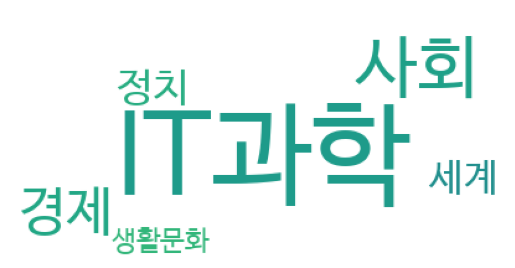

In [58]:
import matplotlib.pyplot as plt
plt.imshow(wc)
plt.axis('off')
plt.show()